In [162]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy
from astropy.io import ascii

In [142]:
all_SEDM = Table.read("../../../supernova-files/ztf_i_spectra/sample/SEDM_ML_sample.ascii", format = "ascii")
all_SEDM.rename_column('col1', 'ZTF_Name')
all_SEDM.rename_column('col2', "Class")
all_SEDM.rename_column('col3', "redshift")
all_SEDM.rename_column('col8', "Version")

In [143]:
zooniverse_results = Table.from_pandas(pd.read_csv("zooniverse_results_ZTFI.csv"))
superfit_results = Table.from_pandas(pd.read_csv("../../../supernova-files/superfit_classes_ZTFI.csv"))

In [144]:
combined = astropy.table.join(superfit_results, zooniverse_results, keys = ["Version"])

In [145]:
TypeII_Final_Results = Table.from_pandas(pd.read_csv("TypeII_Final.csv"))

In [146]:
final_rcf_table = Table.from_pandas(pd.read_hdf("../../../supernova-files/final_rcf_table.h5"))

In [147]:
SNID_output = Table.from_pandas(pd.read_csv("../SNID_2020_output.csv"))

In [148]:
all_SEDM[0]

ZTF_Name,Class,redshift,col4,col5,col6,col7,Version,col9
str12,str12,float64,float64,float64,float64,float64,str43,int64
ZTF18aabssth,II,0.026,0.022914,2458186.5,2459600.24,-1413.74,ZTF18aabssth_20180309_P60_v1.ascii,1


In [149]:
SNID_rcf = astropy.table.join(all_SEDM, SNID_output, keys = ["Version"])

Make a figure comparing the accuracy of SNID at different rlap compared to the frequency of supernova at that rlap.

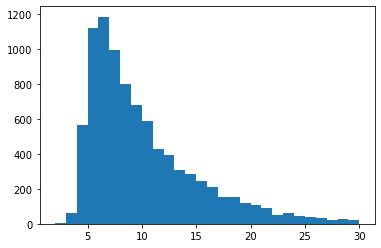

In [150]:
max_rlap = 30
min_rlap = 2
reasonable_snid_data = SNID_rcf[np.where((SNID_rcf["rlap_1"] > min_rlap) & (SNID_rcf["rlap_1"] < max_rlap))]
bins = plt.hist(reasonable_snid_data["rlap_1"], bins=range(2,31))
n_bins = len(bins[0])


In [151]:
reasonable_snid_data[0]

ZTF_Name_1,Class,redshift,col4,col5,col6,col7,Version,col9,ZTF_Name_2,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5
str12,str12,float64,float64,float64,float64,float64,str43,int64,str12,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64
AT2018hrg,nova,-0.00016,-0.00016,2458425.5,nan,nan,AT2018hrg_20181103_P60_v1.ascii,2,AT2018hrg,sn2006bp,5.84,0.0068,0.0091,1,1,sn2006bp,5.84,II-norm,0.0068,0.0091,4.2,0,3,sn1987A,5.76,II-norm,0.0085,0.0094,-78.5,0,6,sn06bp,5.71,II-norm,0.0064,0.0092,7.2,0,18,sn1996cb,5.34,IIb,0.0158,0.0101,-18.0,0,35,lbv01ac,5.06,LBV,-0.0005,0.0045,-99.9,2


In [152]:
counter = np.zeros(n_bins)
correct = np.zeros(n_bins)
for i in range(len(reasonable_snid_data)):
    row = reasonable_snid_data[i]
    rlap = int(np.floor(row["rlap_1"])) - bins[1][0]
    counter[rlap] += 1
    guess_c = row["c_snid_1"][0:2]
    correct[rlap] += (guess_c in row["Class"])
accuracy = correct/counter

In [153]:
bins

(array([   6.,   59.,  565., 1118., 1184.,  996.,  799.,  679.,  585.,
         426.,  391.,  306.,  283.,  242.,  211.,  155.,  154.,  117.,
         108.,   93.,   48.,   61.,   44.,   40.,   32.,   23.,   25.,
          19.]),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <BarContainer object of 28 artists>)

Text(0.5, 0, 'rlap')

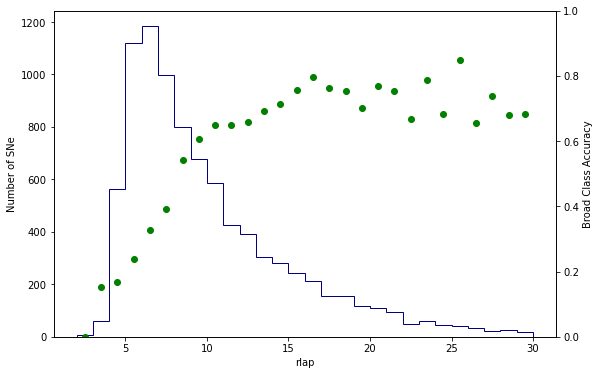

In [154]:
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()
ax2.set_ylim(0, 1)
ax1.hist(reasonable_snid_data["rlap_1"], bins=range(2,31), histtype='step', stacked = True, fill = False, color = "navy")
ax2.scatter(np.linspace(2.5,29.5,28),accuracy, color = "green")
ax1.set_ylabel("Number of SNe")
ax2.set_ylabel("Broad Class Accuracy")
ax1.set_xlabel("rlap")

Make a graph for each of the false negatives found by the Zooniverse

In [155]:
false_positives = Table.from_pandas(pd.read_csv("../FalsePositives.csv"))

In [156]:
false_positives

Unnamed: 0,ZTF_Name,spectra_file,sn_type,superfit_sn_type,zooniverse_sn_type,z_sn,in_rcfI,sn_type_rcfI,in_marshall,sn_type_marshall
int64,str12,str36,str2,str3,str7,float64,bool,str2,bool,str8
0,ZTF18aabxlsv,ZTF18aabxlsv_20181110_Keck1_v1.ascii,II,IIb,IIn,0.0497,True,Ib,True,Ib
1,ZTF18aaeoiwu,ZTF18aaeoiwu_20191019_P60_v1.ascii,II,IIn,II-norm,0.6259,False,--,True,star
2,ZTF18abpmwfx,ZTF18abpmwfx_20180826_P60_v1.ascii,II,II,IIn,-0.0033,False,--,True,CV
3,ZTF18acbvkwl,ZTF18acbvkwl_20181121_P60_v1.ascii,II,IIn,II-norm,0.0906,False,--,True,AGN
4,ZTF19aarpymc,ZTF19aarpymc_20200924_P60_v1.ascii,II,IIn,II-norm,0.0783,False,--,True,AGN
5,ZTF19aayimmc,ZTF19aayimmc_20190927_P60_v1.ascii,II,II,II-norm,0.0059,False,--,True,LBV
6,ZTF19abclykm,ZTF19abclykm_20190803_P60_v1.ascii,II,IIn,II-norm,0.0916,False,--,True,NLS1
7,ZTF19abiyyun,ZTF19abiyyun_20190808_P60_v2.ascii,II,IIn,IIn,0.0439,False,--,True,Ic
8,ZTF19abxgmzr,ZTF19abxgmzr_20200622_Keck1_v1.ascii,II,IIn,II-norm,0.1326,False,--,True,SLSN-I.5


In [157]:
spectra_path = "../../../supernova-files/ztf_i_spectra/sample/spectra/"

In [178]:
##wavelen         flux     sky_flux     flux_unc  xpixel    ypixel     response 
spectra = ascii.read(spectra_path + "ZTF21aawtewf_20210513_NOT_v1.ascii", names = ["wavelen", "flux", "flux_unc"])
spectra

wavelen,flux,flux_unc
float64,float64,float64
3850.9530519728073,1.8542067863456792e-16,2.0009180072047536e-17
3854.207707055829,1.6917550997029676e-16,1.8128144721399035e-17
3857.4623621388505,1.7087873508723434e-16,1.7020883188502476e-17
3860.717017221872,1.691956134165623e-16,1.6442118886001284e-17
3863.9716723048937,1.876484304687361e-16,1.6972203797731936e-17
3867.2263273879153,1.553994969544084e-16,1.6810236935195402e-17
3870.480982470937,1.778559841669451e-16,1.8344831077804806e-17
3873.7356375539584,1.4274564542579428e-16,1.8906020750886784e-17
3876.99029263698,1.4002580787959715e-16,1.9435608015339644e-17


In [186]:
spectra_list = []
for i in false_positives:
    spectra = ascii.read(spectra_path + i["spectra_file"])
    if("Keck" in i["spectra_file"]):
        spectra.rename_column('col1', 'wavelen')
        spectra.rename_column('col2', "flux")
        spectra.rename_column('col3', "sky_flux")
        spectra.rename_column('col4', "flux_unc")
        spectra.rename_column('col5', "xpixel")
        spectra.rename_column('col6', "ypixel")
        spectra.rename_column('col7', "response")
    if("P60" in i["spectra_file"]):
        spectra.rename_column('col1', 'wavelen')
        spectra.rename_column('col2', "flux")
        spectra.rename_column('col3', "flux_unc")
    if("NOT" in i["spectra_file"]):
        spectra = ascii.read(spectra_path + "ZTF21aawtewf_20210513_NOT_v1.ascii", names = ["wavelen", "flux", "flux_unc"])
    spectra_list.append([i["ZTF_Name"], spectra])

KeyError: 'Column col3 does not exist'

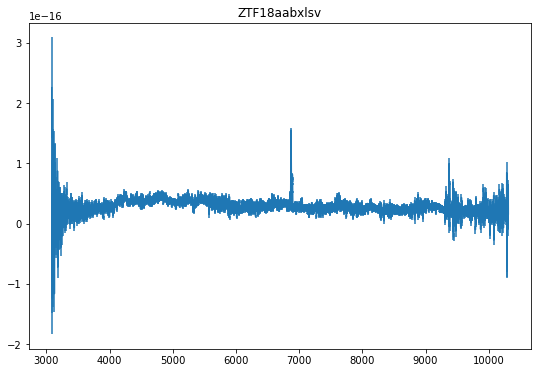

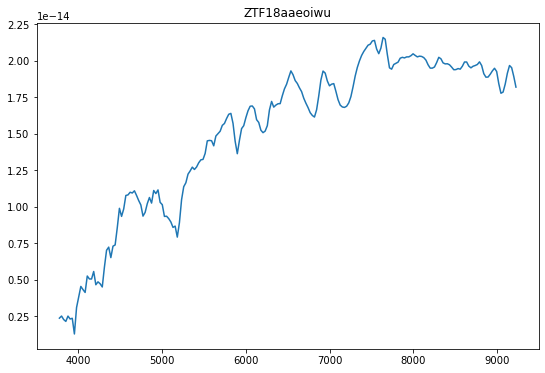

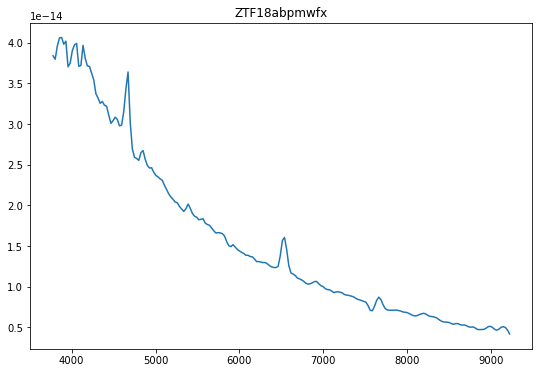

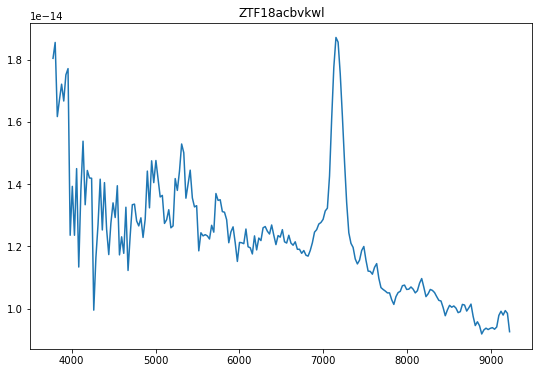

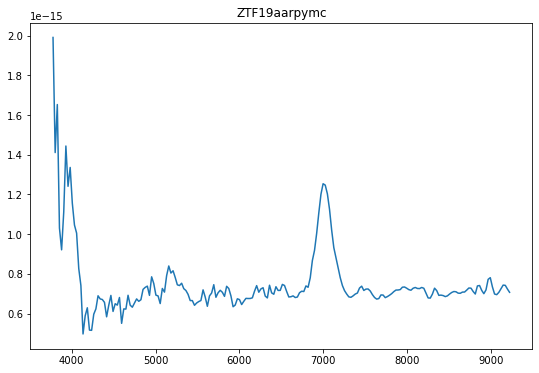

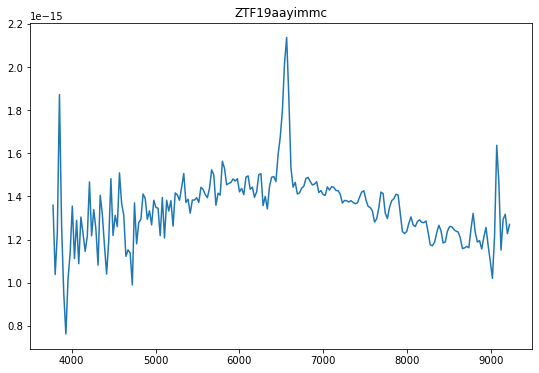

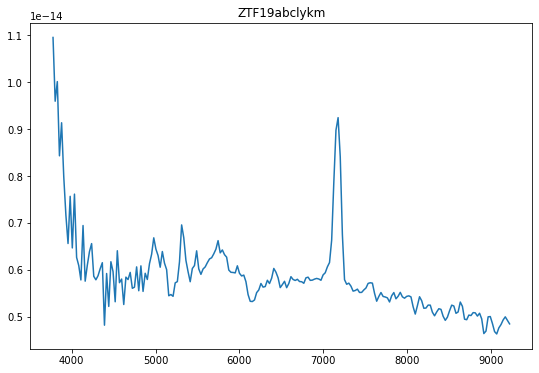

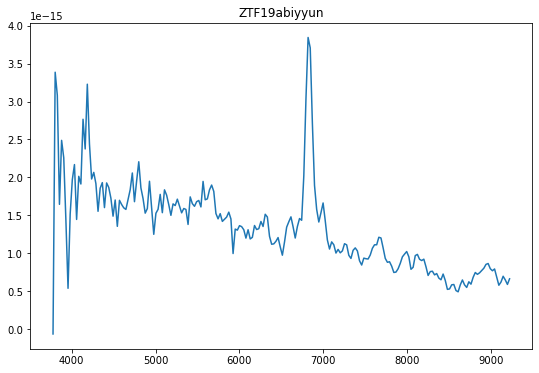

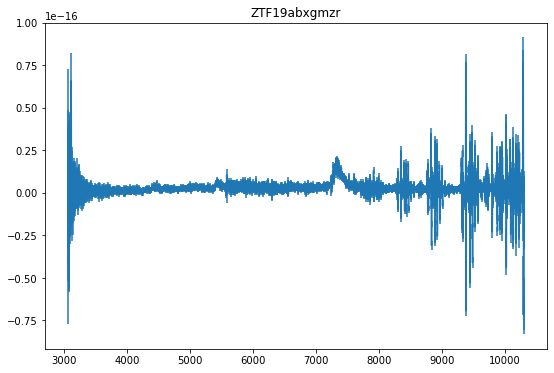

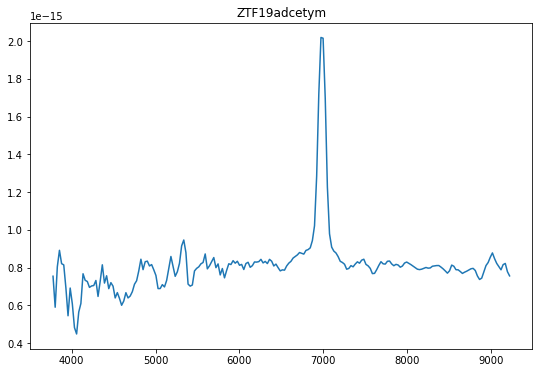

In [187]:
for i in spectra_list:
    spectra = i[1]
    fig, ax1 = plt.subplots(figsize=(9, 6))
    ax1.set_title(i[0])
    ax1.errorbar(spectra["wavelen"], spectra["flux"], spectra["flux_unc"])

In [185]:
spectra_list[0][1]

col1,col2,col3,col4,col5,col6,col7
float64,float64,float64,float64,int64,float64,float64
3085.3381,2.25414e-16,8.38439e-16,8.3313e-17,778,78.032,224119000000000.0
3087.292,-7.94995e-17,5.92955e-16,6.94409e-17,779,78.036,235295000000000.0
3089.2463,-2.64195e-17,6.92174e-16,6.98235e-17,780,78.039,246910000000000.0
3091.2014,-1.64486e-17,6.82693e-16,6.72039e-17,781,78.043,258967000000000.0
3093.157,4.26475e-17,5.04536e-16,6.23217e-17,782,78.047,271464000000000.0
3095.113,-1.23936e-16,6.2799e-16,5.91119e-17,783,78.05,284397000000000.0
3097.0698,-3.49668e-17,5.48886e-16,5.71267e-17,784,78.054,297756000000000.0
3099.0273,-8.45123e-17,5.34918e-16,5.37641e-17,785,78.058,311514000000000.0
3100.9854,1.49056e-16,5.76761e-16,5.72193e-17,786,78.061,325652000000000.0
